<a href="https://colab.research.google.com/github/carlacotas/data-science-kaggle-Titanic-Project/blob/main/TitanicProjectExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt

# **kaggle 'Competitions': Titanic Project**

This notebook contains the solution for the [Titanic ML competition on Kaggle]( https://www.kaggle.com/c/titanic) following the steps presented by Ken Jee [Titanic Project Example](https://www.kaggle.com/kenjee/titanic-project-example)


**Main objective:** use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

**Main steps**

1. Understand the shape of the data (Histograms, box plots, etc.)
2. Data Cleaning
3. Data Exploration
4. Feature Engineering
5. Data Preprocessing for Model
6. Basic Model Building
7. Model Tuning
8. Ensemble Modle Building
9. Results

> Note: It is very important to know all the information needed to get ready to start working through this problem. Thus, **Section 1. Data information** is composed with information provided in the [Titanic ML competition on Kaggle]( https://www.kaggle.com/c/titanic). The goal is to have access to all the information and solution in one single notebook. 

</br>
</br>

## **1. Data information**


### **1.1 The Challenge**
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

</br>

### **1.2 What Data Will I Use in This Competition?**
In this competition, you’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the `train.csv` data, predict whether the other 418 passengers on board (found in `test.csv`) survived.

The **training set** should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The **test set** should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

</br>

### **1.3 Data Dictionary**

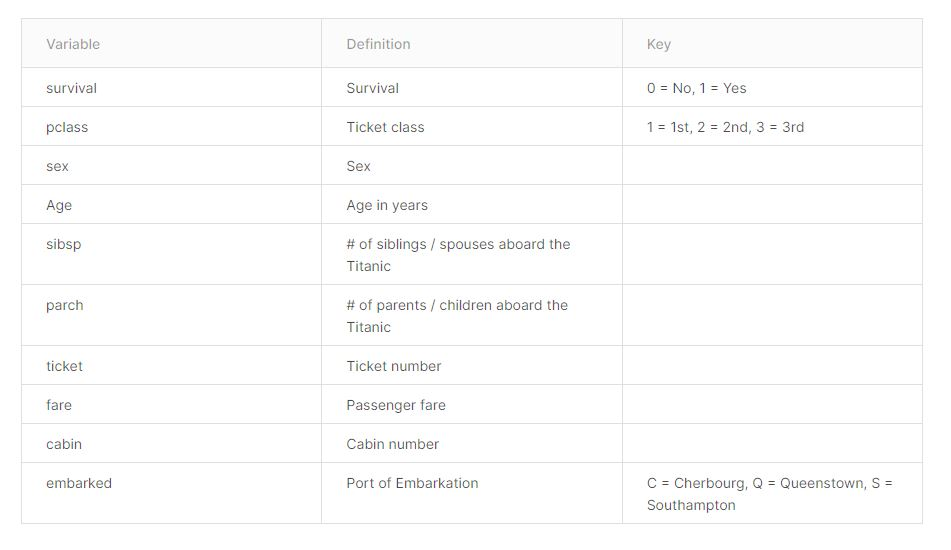

#### **1.3.1 Variable Notes**

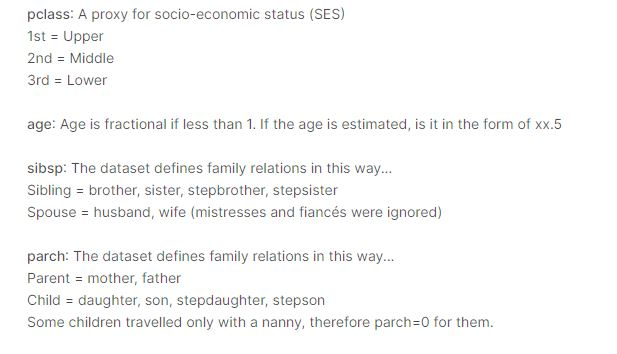


</br>

## **2. Understand the shape of the data (Histograms, box plots, etc.)**





>The first analysis is always made working with the Training set. Only after this first analysis, it comes the final step which is to make predictions based on the test set.

The first thing to do is to import the data.

In [2]:
# reading files from pc in google colab
from google.colab import files
import io
uploaded = files.upload()

# import the data
training = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

training['train_test'] = 1
test['train_test'] = 0
all_data = pd.concat([training,test])

%matplotlib inline
all_data.columns




Saving test.csv to test.csv
Saving train.csv to train.csv


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

### **2.1 Data Exploration**

First, we should look at our data to understand the data types and null counts to think about how to manage that data/information

In [3]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [38]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,cabin_multiple,cabin_adv,numeric_ticket,ticket_letters
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,n,0,a5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,C,0,pc
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,n,0,stono2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,C,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,n,1,0


In [39]:
training.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,cabin_multiple,cabin_adv,numeric_ticket,ticket_letters
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,1,0,n,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,1,1,B,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,1,0,n,0,wc
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,1,1,C,1,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,1,0,n,1,0


Also, it is important to get some information about descriptive statistics

In [4]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


It is very advantageous for the data analysis, if we can look to the columns and the data presented for each column. Thus, it is possible to separate numeric and categorical values  

In [5]:
#quick way to see all the columns name, and, separate numeric and categorical colummns
training.describe().columns
df_num = training[['Age','SibSp','Parch','Fare']] #numerical variables
df_cat = training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']] #categorical variables


# ***a little data remimder ***
#Age   - age in years
#SibSp - # of siblings / spouses aboard the Titanic
#Parch - # of parents / children aboard the Titanic
#Fare  - Passenger fare


#### **2.1.1 Distributions**

Now, it's time to get some visuals from **numerical variables** to start thinking on the data from a critical point of view


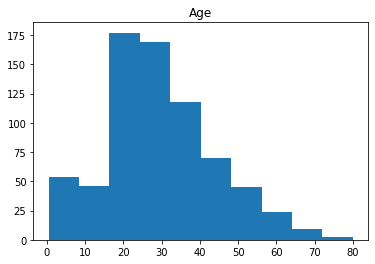

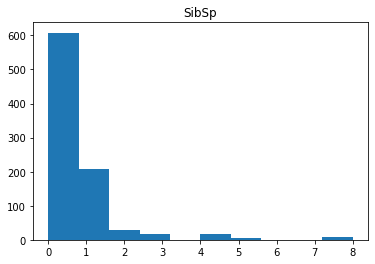

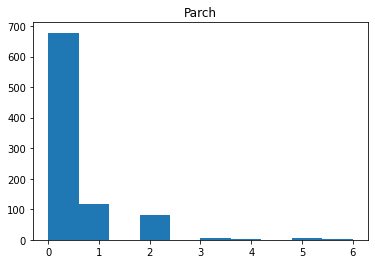

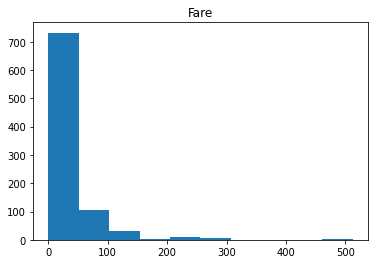

In [6]:
#distributions for all numerical variables 
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

From the histograms above, it is easily seen that only 'Age' seems to follow a normal distribution. For 'SibSp', 'Parch' and 'Fare' perhaps it can be useful to normalise them. So let's consider normalizing them

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


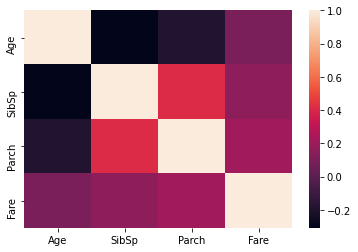

In [7]:
print(df_num.corr())
sns.heatmap(df_num.corr())

Here, we can see that 'Parch' and 'SibSp' are the most correlated variables, which means that families were traveling together aboard the Titanic. For the numerical variables, it is important to look at the survival rate across those variables. Thus, it can be answered the question: how it is related the survival rate across some groups of passenger?


In [8]:
# survival rate across the numerical variables Age, SibSp, Parch, and Fare 
pd.pivot_table(training, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

#Little remimder, survived: 0(No) and 1(Yes)


,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


From the survival rate results presented above, we can start to conclude that:
- younger people may have high chance to survive
- people that paid more also have more chance to survive
- kids with parents on board may have a high chance to survive
- people with siblings on board may have low chance to survive

The next question is: what about **categorical variables**?
Now, it's time to get some visuals from **categorical variables** to add more knowledge about data to continue thinking from a critical point of view

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


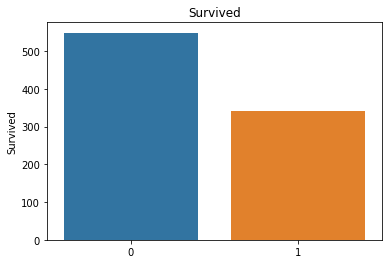

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


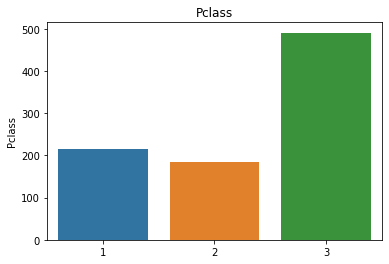

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


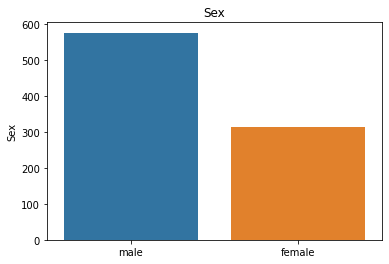

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


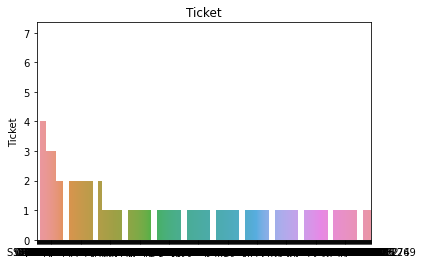

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


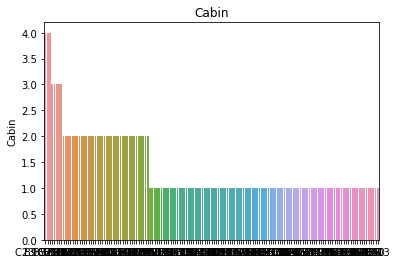

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


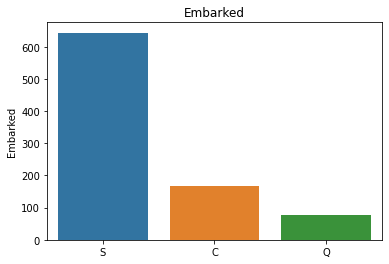

In [9]:
#distributions for all categorical variables 
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()\

All the histograms have useful information; however, 'Ticket' and 'Cabin' histograms are not very legible -> **Note:** further work, *to do some feature engineering!*

**And, what about how it is related the survival rate across these categorical variables?**

In [10]:
# survival rate across all the categorical variables
print(pd.pivot_table(training, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


it is evident that:
- people from 1st class survived more than people on the 3rd class
- women survived more than men
- Passengers that embarked from C(Cherbourg) maybe have a little more chance to survive

#### **2.1.2 Feature Engineering**

In this step, the main objective is to get more information to complement the histograms visualisation for the categorical variables `Cabin` and `Ticket`. Moreover, as indicated in the problem challenge ([Titanic ML competition on Kaggle]( https://www.kaggle.com/c/titanic)), we can also use [feature engineering]( https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/) to create new features. 






#### ***Cabin***

In [20]:
#quick way to see the first 5 rows from the categorical variables to see how a cabin number looks like
df_cat.head()


,Survived,Pclass,Sex,Ticket,Cabin,Embarked
0,0,3,male,A/5 21171,NaN,S
1,1,1,female,PC 17599,C85,C
2,1,3,female,STON/O2. 3101282,NaN,S
3,1,1,female,113803,C123,S
4,0,3,male,373450,NaN,S


In [21]:
#quick way to see the last 5 rows from the categorical variables
df_cat.tail(5)

,Survived,Pclass,Sex,Ticket,Cabin,Embarked
886,0,2,male,211536,NaN,S
887,1,1,female,112053,B42,S
888,0,3,female,W./C. 6607,NaN,S
889,1,1,male,111369,C148,C
890,0,3,male,370376,NaN,Q


> It looks like that the Cabin number are only for the 1st class. 


**Was it possible that a passenger have multiple Cabins?**

In [18]:
#well, first we can investigate further if one passenger had multiple Cabins
df_cat.Cabin
training['cabin_multiple'] = training.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
# after looking at this, we may want to look at cabin by letter or by number. Let's create some categories for this 
# letters 
# multiple letters 
training['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

**And, what about how it is related the survival rate if passenger had multiple Cabins?**

In [22]:
pd.pivot_table(training, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket' ,aggfunc ='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


It is clear that:
- passengers with only one Cabin have low chance to survive (maybe travelling alone and not in the prioritory group)
- passengers with two or three cabins survived more than passengers with only on Cabin (maybe passengers travelling in family, the prioritory by group was followed, kids and mothers first) 

**Now, what about the Cabin letter and the survival rate?**

In [23]:
#creates categories based on the cabin letter (n stands for null)
#in this case we will treat null values like it's own category
training['cabin_adv'] = training.Cabin.apply(lambda x: str(x)[0])

#comparing survival rate by cabin
print(training.cabin_adv.value_counts())
pd.pivot_table(training,index='Survived',columns='cabin_adv', values = 'Name', aggfunc='count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


It can be concluded that:
- Passengers from cabins with letters have more chance to survive
- Maybe it is a coincidence, and it should/can be investigated further, but how it is the null cabin letter related with passenger with only one cabin

#### ***Tickets***

**Is there any combination from the ticket information and the survival rate?**

In [27]:
#a quick recap about the first 5 rows from the categorical variables to see how ticket looks like
df_cat.head()



,Survived,Pclass,Sex,Ticket,Cabin,Embarked
0,0,3,male,A/5 21171,NaN,S
1,1,1,female,PC 17599,C85,C
2,1,3,female,STON/O2. 3101282,NaN,S
3,1,1,female,113803,C123,S
4,0,3,male,373450,NaN,S


In [34]:
#separate the ticket by letters and numbers
training['numeric_ticket'] = training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
training['ticket_letters'] = training.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

print('number of tickets with only numbers:')
training['numeric_ticket'].value_counts()


number of tickets with only numbers:


1    661
0    230
Name: numeric_ticket, dtype: int64

In [35]:
print('number of ticket with letters:')
training['ticket_letters'].value_counts()

number of ticket with letters:


0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
c              5
fcc            5
pp             3
sopp           3
wep            3
sotono2        2
scah           2
ppp            2
swpp           2
scahbasle      1
fa             1
scow           1
casoton        1
sp             1
as             1
sop            1
fc             1
sca4           1
sc             1
Name: ticket_letters, dtype: int64

In [36]:
#difference from tickets if they are only numeric in the survival rate 
pd.pivot_table(training,index='Survived',columns='numeric_ticket', values = 'Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [37]:
#difference from tickets if they have letters in the survival rate 
pd.pivot_table(training,index='Survived',columns='ticket_letters', values = 'Ticket', aggfunc='count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,pc,pp,ppp,sc,sca4,scah,scahbasle,scow,scparis,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,21.0,1.0,1.0,NaN,1.0,1.0,NaN,1.0,6.0,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,39.0,2.0,1.0,1.0,NaN,1.0,1.0,NaN,5.0,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


It is a little difficult to get some conclusions about the survival rate and how it can be related with the tickets having letters. The meaning of the letters is very important to make this analysis and without this meaning it is hard to get some conclusions.